In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
titanic = sns.load_dataset('titanic')

#titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.isna().sum() / titanic.shape[0] * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [6]:
sns.set_context('notebook')

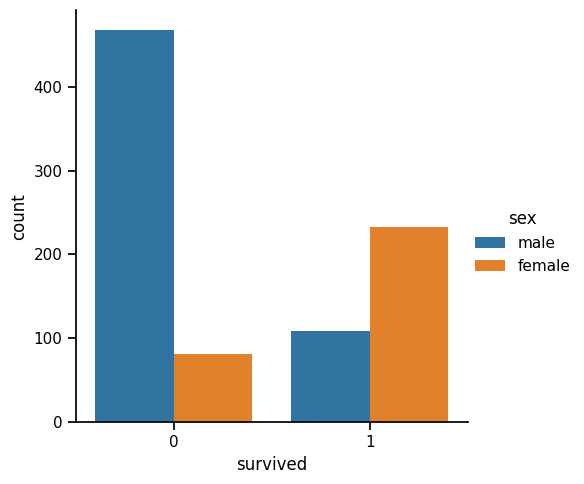

In [7]:
# a much higher proportion of females survived compared to males

sns.catplot(
    data=titanic,
    x='survived',
    hue='sex',
    kind='count',
)

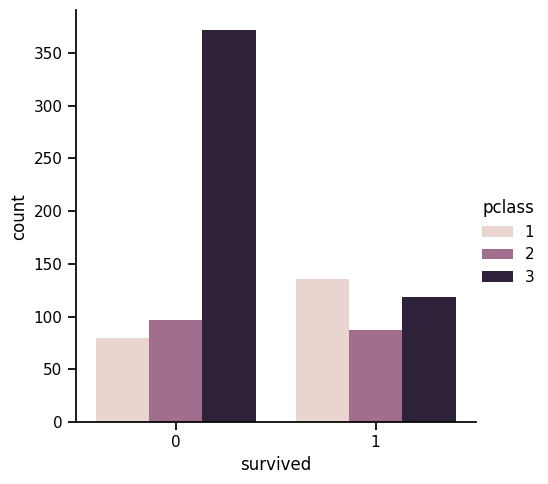

In [8]:
# Wealth access played a significant role in determining who made it into the lifeboats.

sns.catplot(
    data=titanic,
    x='survived',
    hue='pclass',
    kind='count',
)

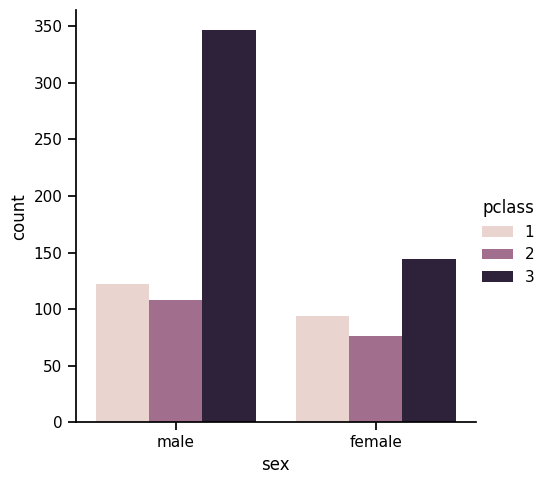

In [9]:
sns.catplot(
    data=titanic,
    x='sex',
    hue='pclass',
    kind='count',
)

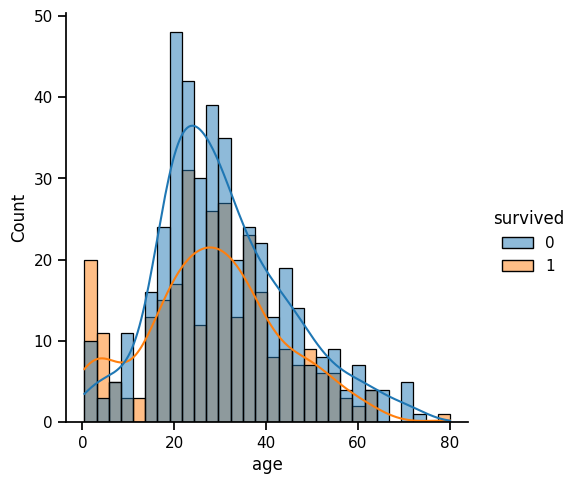

In [10]:
# Children (low ages) have a higher survival density

sns.displot(
    data=titanic,
    x='age',
    hue='survived',
    bins=30,
    kde=True,
)

/tmp/ipykernel_6205/3877064363.py:4: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.catplot(


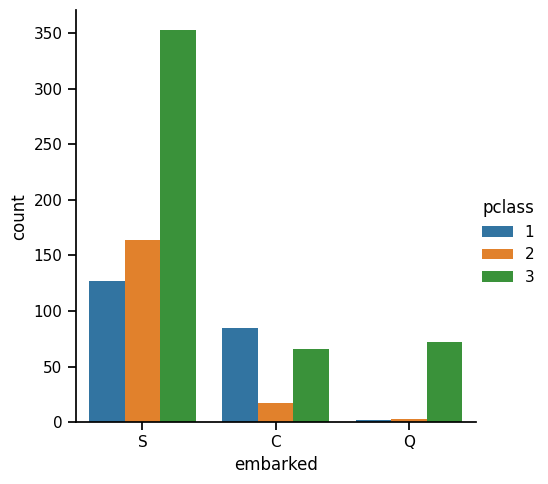

In [11]:
# Different embarkation points also skewed class mixes, which may have indirectly influenced survival
# Type C embarkation people were richer than others

sns.catplot(
    data=titanic,
    x='embarked',
    kind='count',
    hue='pclass',
    palette=sns.color_palette("tab10")
)

In [12]:
titanic['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

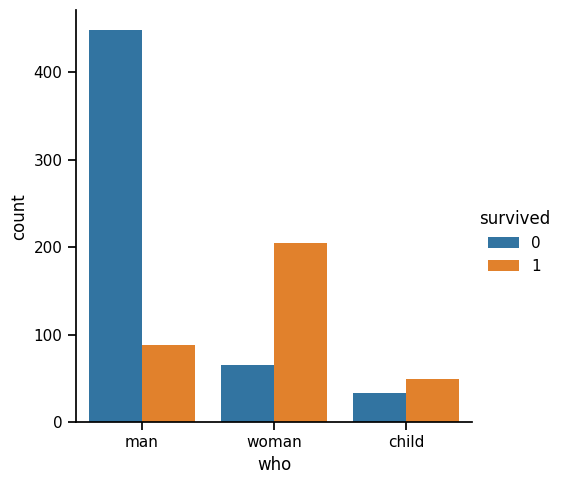

In [13]:
# Women and children survive more than men

sns.catplot(
    data=titanic,
    x='who',
    kind='count',
    hue='survived',
)

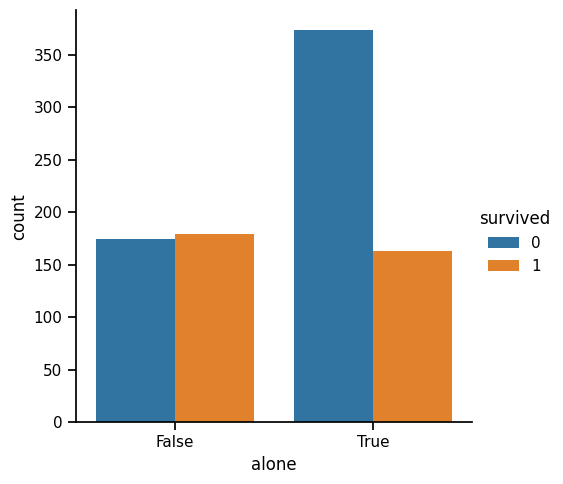

In [14]:
# Those traveling alone fared worse, likely because family groups often stuck together and prioritized one another.

sns.catplot(
    data=titanic,
    x='alone',
    kind='count',
    hue='survived',
)

In [15]:
titanic['alone'] = titanic['alone'].map({
    True: 1,
    False: 0
})

titanic['who'] = titanic['who'].map({
    'man': 1,
    'woman': 2,
    'child': 3,
})


df_numerical = titanic.select_dtypes(include=['int64', 'float64'])

<Axes: >

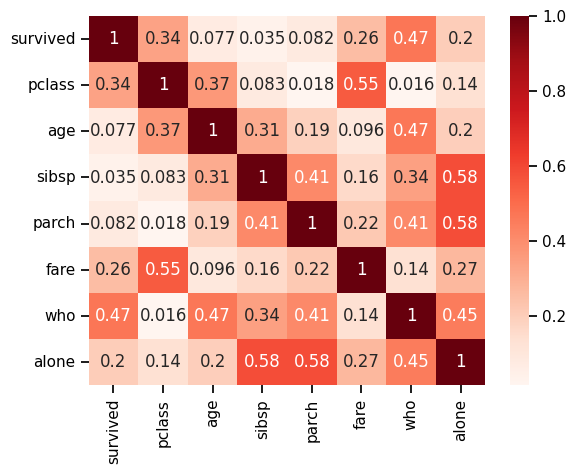

In [16]:
# computed and heatmapped the absolute correlations among numeric features
# Survival correlates weakly with these numeric features
# Maybe categorical splits (sex, class, age group) capture more signal than raw numbers.

sns.heatmap(
    abs(df_numerical.corr()),
    annot=True,
    cmap='Reds',
)

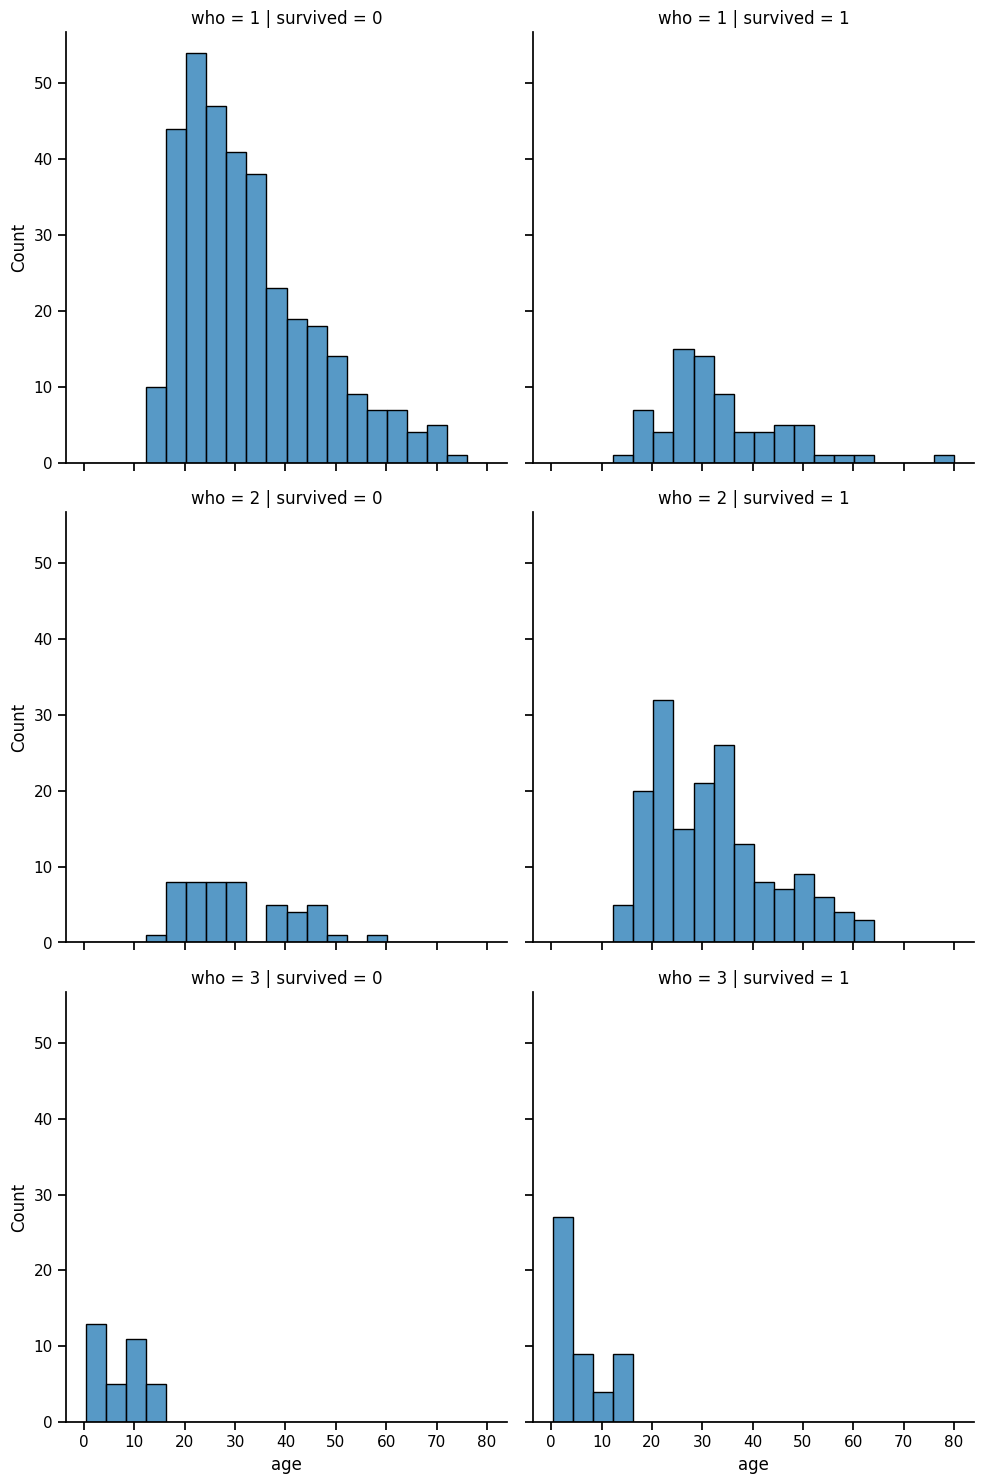

In [17]:
sns.displot(
    data=titanic,
    x='age',
    col='survived',
    row='who'
)

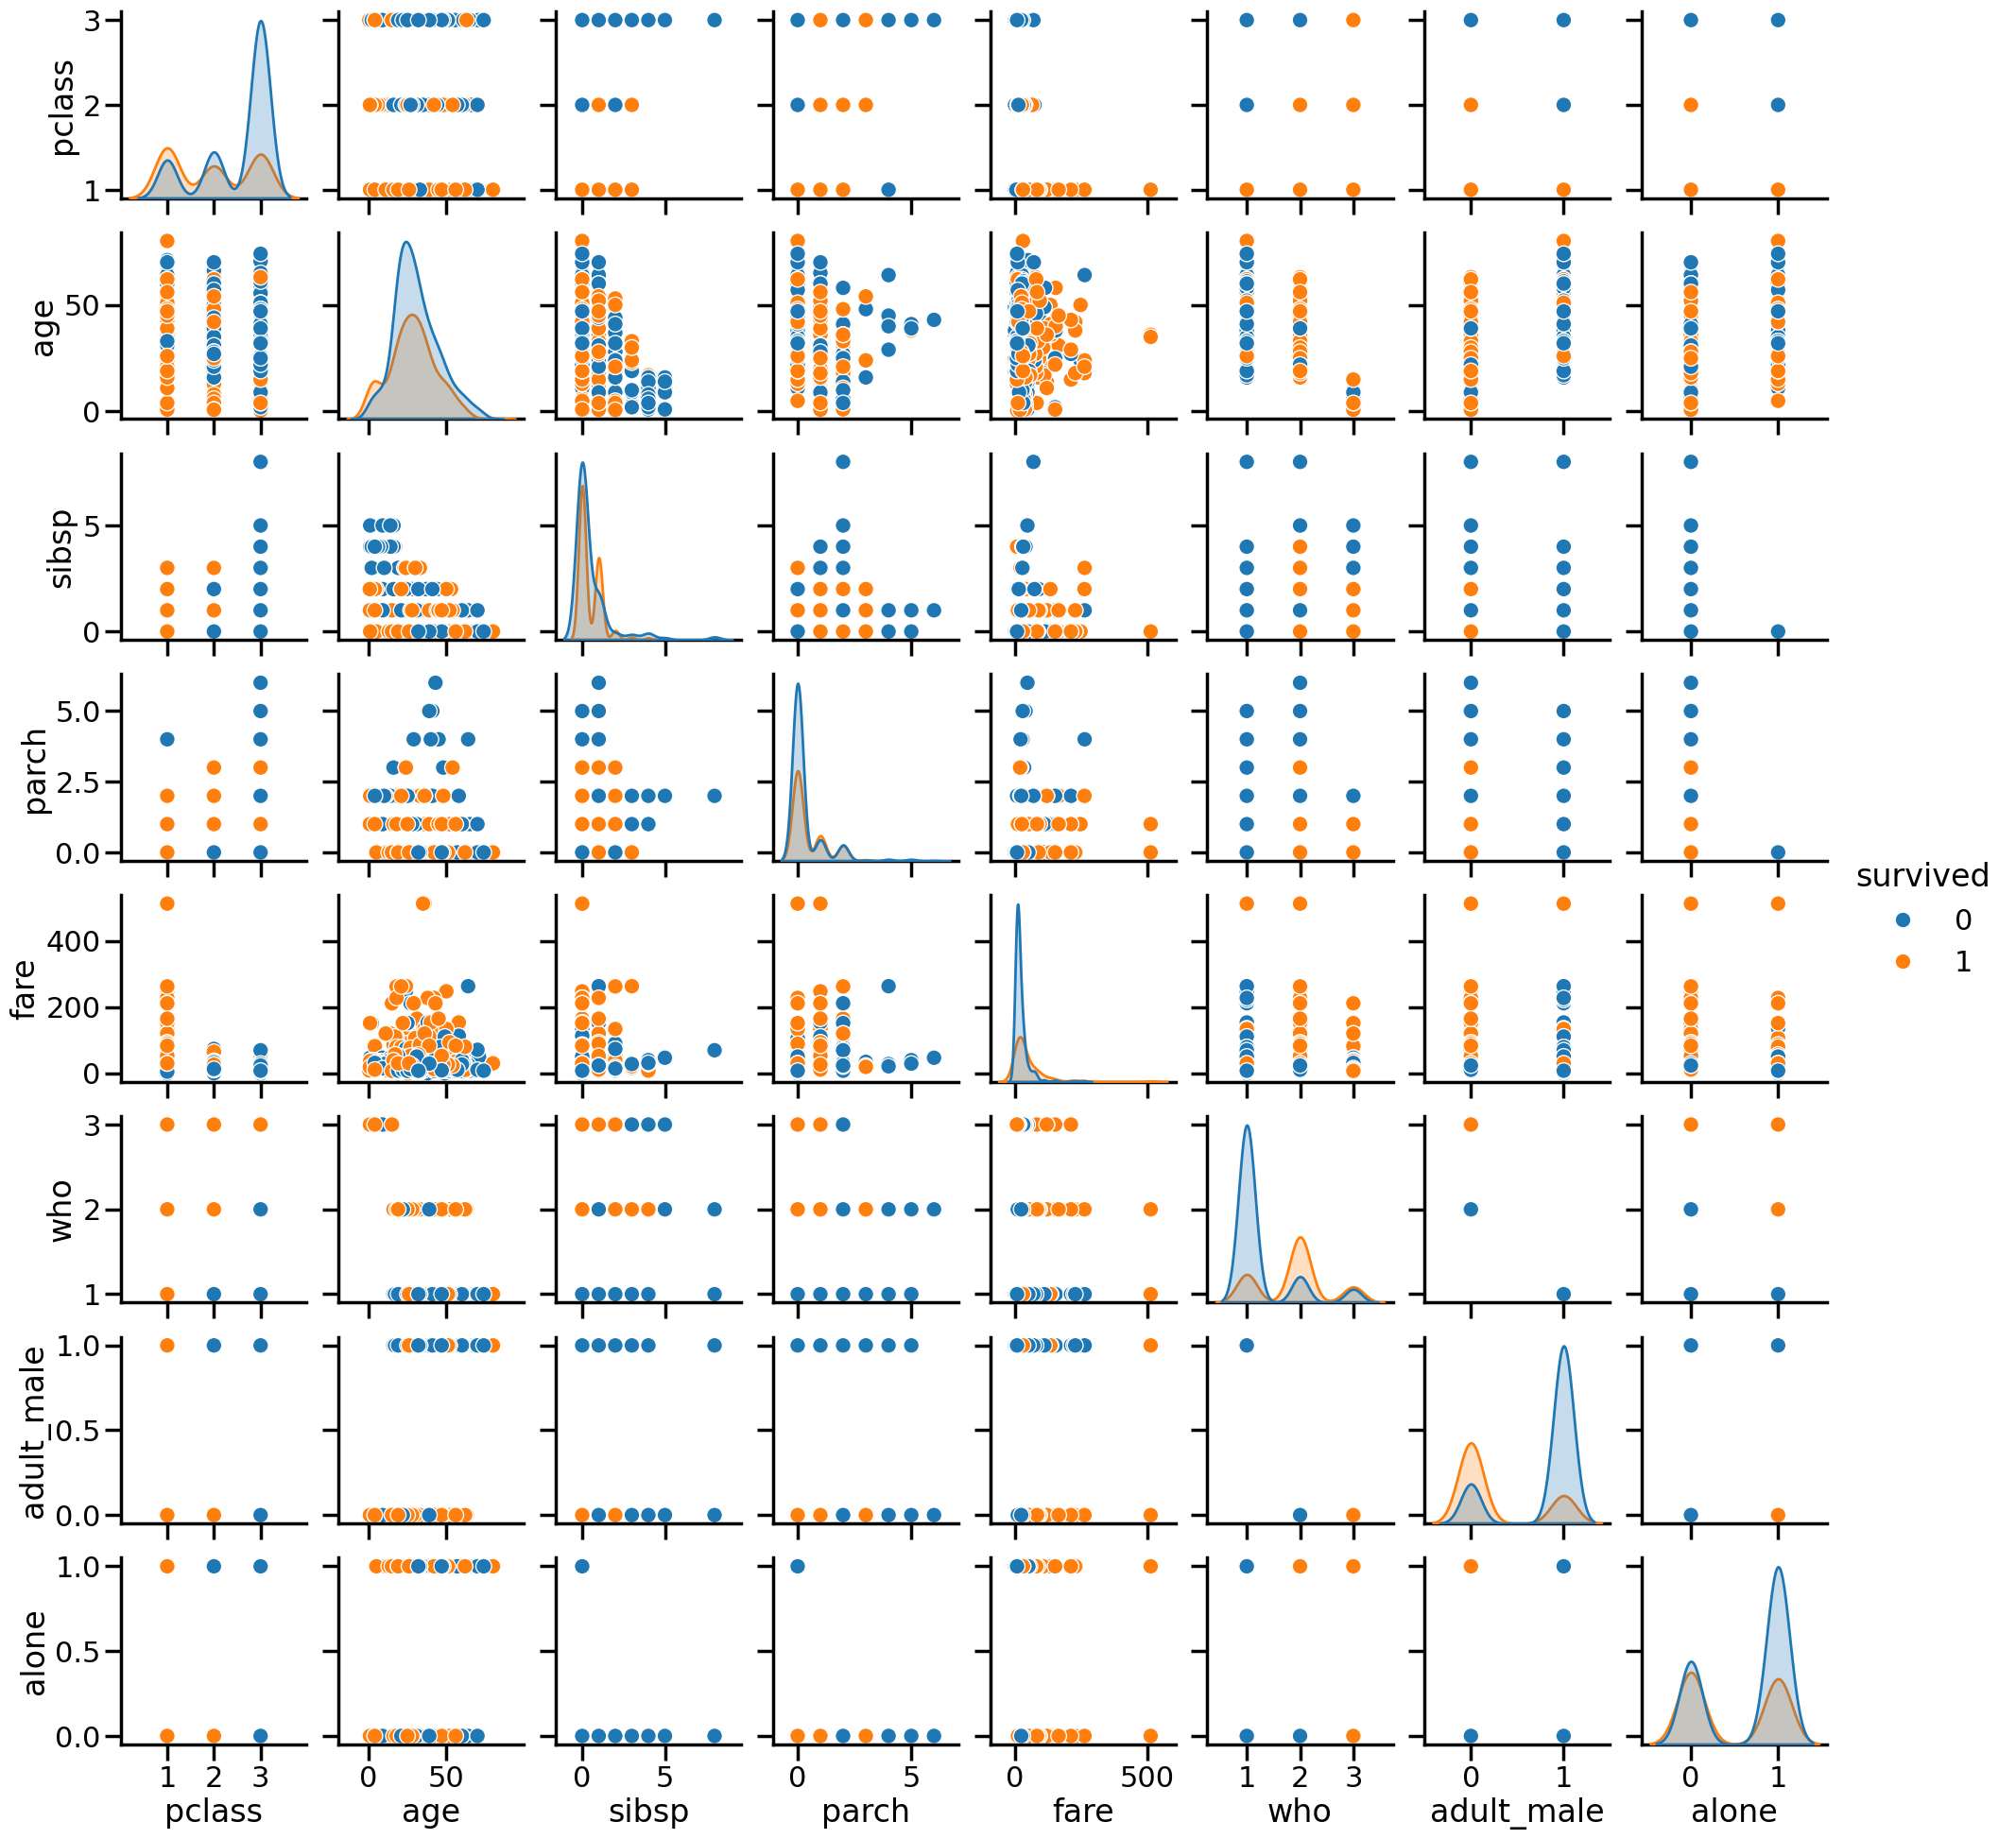

In [18]:
sns.set_context('poster')
sns.pairplot(titanic, hue='survived')